# Imports

In [0]:
%tensorflow_version 2.x

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})
seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

#Dataset

In [13]:
from google.colab import files
uploaded = files.upload()

Saving apples_and_grapes_filtered.zip to apples_and_grapes_filtered (1).zip


In [0]:
!unzip apples_and_grapes_filtered.zip

In [0]:
path = '/content/apples_and_grapes_filtered'

train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')

train_apples_dir = os.path.join(train_dir, 'apples')  
train_grapes_dir = os.path.join(train_dir, 'grapes')

validation_apples_dir = os.path.join(validation_dir, 'apples') 
validation_grapes_dir = os.path.join(validation_dir, 'grapes')  

In [24]:
num_apples_tr = len(os.listdir(train_apples_dir))
num_grapes_tr = len(os.listdir(train_grapes_dir))

num_apples_val = len(os.listdir(validation_apples_dir))
num_grapes_val = len(os.listdir(validation_grapes_dir))

total_train = num_apples_tr + num_grapes_tr
total_val = num_apples_val + num_grapes_val

print('total training apple images:', num_apples_tr)
print('total training grapes images:', num_grapes_tr)

print('total validation apple images:', num_apples_val)
print('total validation grapes images:', num_grapes_val)

print("Total training images:", total_train)
print("Total validation images:", total_val)

total training apple images: 1909
total training grapes images: 1883
total validation apple images: 916
total validation grapes images: 980
Total training images: 3792
Total validation images: 1896


In [0]:
epochs = 15
batch_size = 128
IMAGE_SIZE = (100, 100)
CLASS_NAMES = ['apples','grapes']

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [30]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')

Found 3792 images belonging to 2 classes.


In [31]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=IMAGE_SIZE,
                                                              class_mode='binary')

Found 1895 images belonging to 2 classes.


In [32]:
training_batch, labels_batch = next(train_data_gen)
training_batch.shape, labels_batch.shape

((128, 100, 100, 3), (128,))

In [0]:
def plot_images(img_batch, labels=None):
  range_count = 15 if len(img_batch) > 15 else len(img_batch)
  plt.figure(figsize=(12,12))
  for i in range(range_count):
    plt.subplot(4,5,i+1) 
    plt.imshow(img_batch[i])
    if (labels is not None):
      plt.title(CLASS_NAMES[np.int(labels[i])]) 
    plt.axis('off')

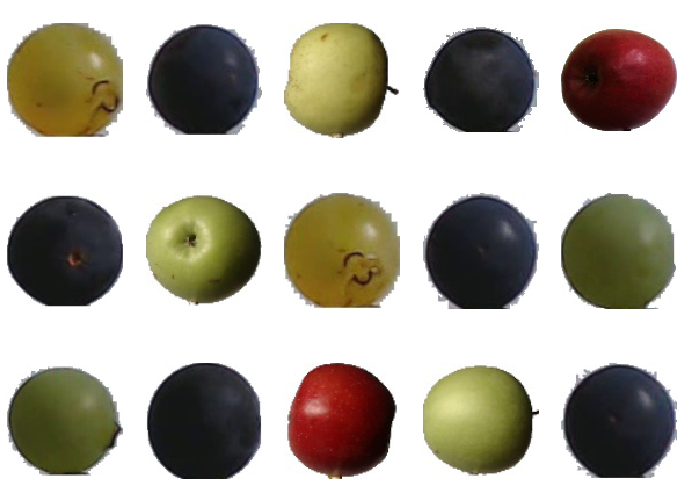

In [34]:
plot_images(training_batch, labels_batch)

#Fully connected neural netowrk

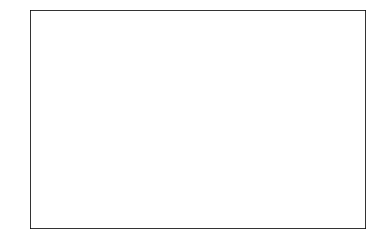

In [36]:
def plot_accuracy_and_loss(history, acc_ylim=[min(plt.ylim()),1.0], loss_ylim=[0,2.0]):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim(acc_ylim)
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim(loss_ylim)
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

def train(m, train_data=train_data_gen, epochs=epochs):
  return m.fit(
            train_data,
            steps_per_epoch=total_train // batch_size,
            epochs=epochs,
            validation_data=val_data_gen,
            validation_steps=total_val // batch_size
          )

In [0]:
model = Sequential([
  Flatten(input_shape=IMAGE_SIZE+(3,)),
  Dense(1024, activation='tanh'),
  Dense(512, activation='tanh'),
  Dense(1, activation='sigmoid')
])

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              30721024  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 31,246,337
Trainable params: 31,246,337
Non-trainable params: 0
_________________________________________________________________


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 29 steps, validate for 14 steps
Epoch 1/15
29/29 [==============================] - 9s 327ms/step - loss: 0.7635 - accuracy: 0.7683 - val_loss: 0.8309 - val_accuracy: 0.7790
Epoch 2/15
29/29 [==============================] - 8s 289ms/step - loss: 0.1175 - accuracy: 0.9757 - val_loss: 0.9693 - val_accuracy: 0.8242
Epoch 3/15
29/29 [==============================] - 8s 292ms/step - loss: 0.0151 - accuracy: 1.0000 - val_loss: 0.9940 - val_accuracy: 0.8281
Epoch 4/15
29/29 [==============================] - 8s 292ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.0313 - val_accuracy: 0.8281
Epoch 5/15
29/29 [==============================] - 9s 295ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.0334 - val_accuracy: 0.8281
Epoch 6/15
29/29 [==============================] - 8s 292ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.0590 - val_accuracy: 0.8281
Epoch 7/15
29/29 [==============================] - 8s 2

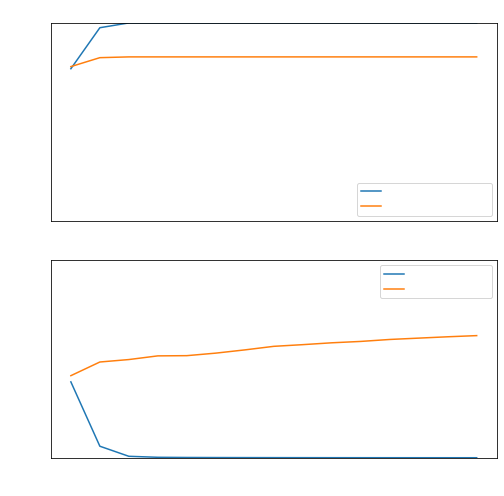

In [40]:
history = train(model)
plot_accuracy_and_loss(history)

#ConvNet

##Convolution

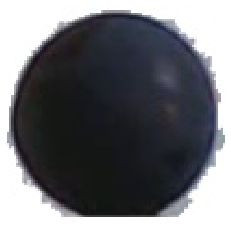

In [41]:
img = training_batch[1]
plt.axis('off')
plt.imshow(img)


In [0]:
def plot_filters(layer):
    filters = layer.shape[3]

    columns = 8
    #rows = ((filters-1) // columns) + 1
    plt.figure(figsize=(20,20))    
    for i in range(filters):
      plt.subplot(columns, columns, i+1)
      plt.title('Filter ' + str(i), color='white')
      plt.axis('off')
      plt.imshow(layer[0,:,:,i], interpolation="nearest", cmap="gray")

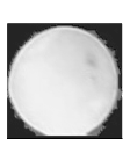

In [43]:
conv = Conv2D(1, 3, padding='same', input_shape=IMAGE_SIZE+(3,))
out = conv(tf.expand_dims(img, 0))
plot_filters(out.numpy())

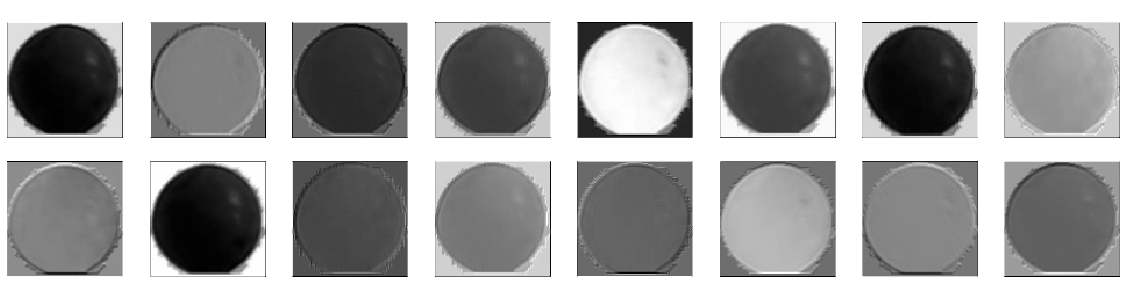

In [44]:
conv = Conv2D(16, 3, padding='same', input_shape=IMAGE_SIZE+(3,))
out = conv(tf.expand_dims(img, 0))
plot_filters(out.numpy())

##ConvModel

In [0]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=IMAGE_SIZE+(3,)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [55]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)            

In [0]:
def plot_model_filters(layers, img):
  input = tf.expand_dims(img, 0)
  for filter_layer in layers:
    output = filter_layer(input)    
    input = output
    print(filter_layer)
    plot_filters(output.numpy())
  return


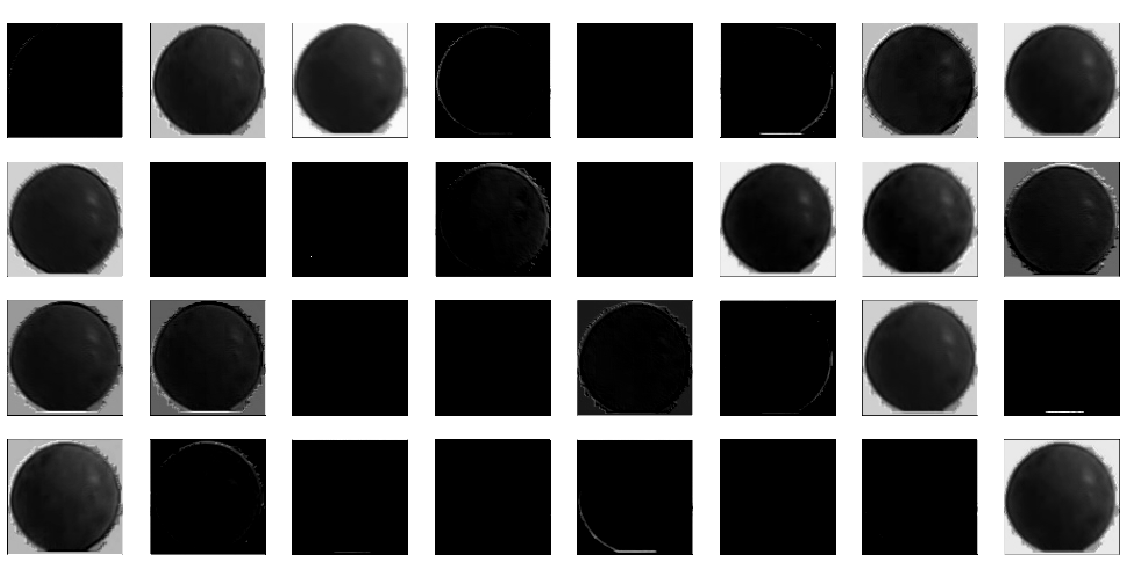

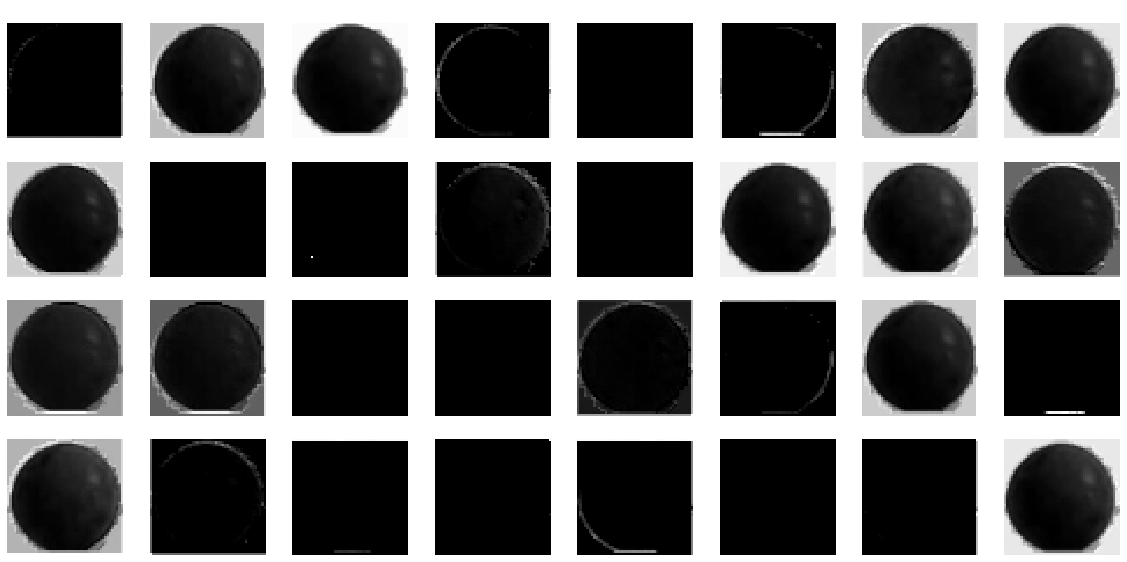

In [48]:
plot_model_filters(model.layers[:2], img)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 29 steps, validate for 14 steps
Epoch 1/15
29/29 [==============================] - 48s 2s/step - loss: 0.1528 - accuracy: 0.9282 - val_loss: 4.1066 - val_accuracy: 0.8281
Epoch 2/15
29/29 [==============================] - 47s 2s/step - loss: 5.2948e-05 - accuracy: 1.0000 - val_loss: 5.2025 - val_accuracy: 0.8281
Epoch 3/15
29/29 [==============================] - 47s 2s/step - loss: 1.7812e-06 - accuracy: 1.0000 - val_loss: 5.2060 - val_accuracy: 0.8281
Epoch 4/15
29/29 [==============================] - 47s 2s/step - loss: 1.5195e-06 - accuracy: 1.0000 - val_loss: 5.2695 - val_accuracy: 0.8281
Epoch 5/15
29/29 [==============================] - 47s 2s/step - loss: 1.2945e-06 - accuracy: 1.0000 - val_loss: 5.3086 - val_accuracy: 0.8281
Epoch 6/15
29/29 [==============================] - 47s 2s/step - loss: 1.1668e-06 - accuracy: 1.0000 - val_loss: 5.3441 - val_accuracy: 0.8281
Epoch 7/15
29/29 [==============================

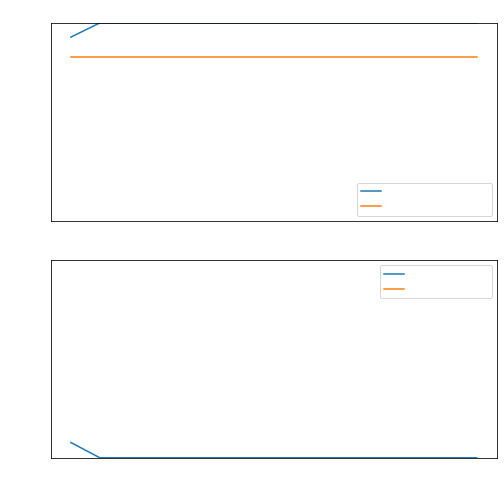

In [49]:
history = train(model)
plot_accuracy_and_loss(history)

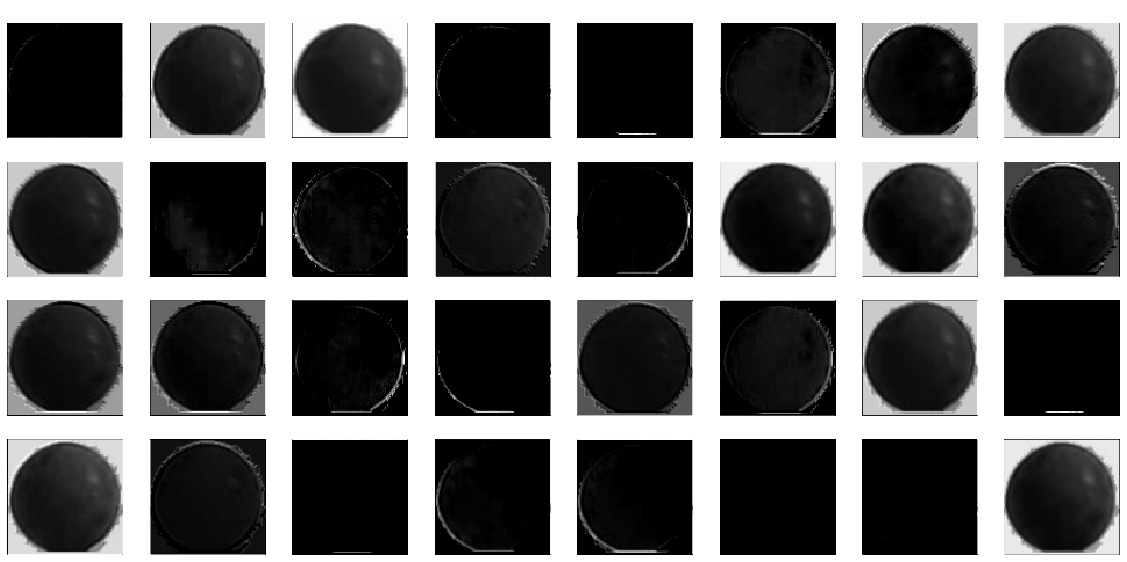

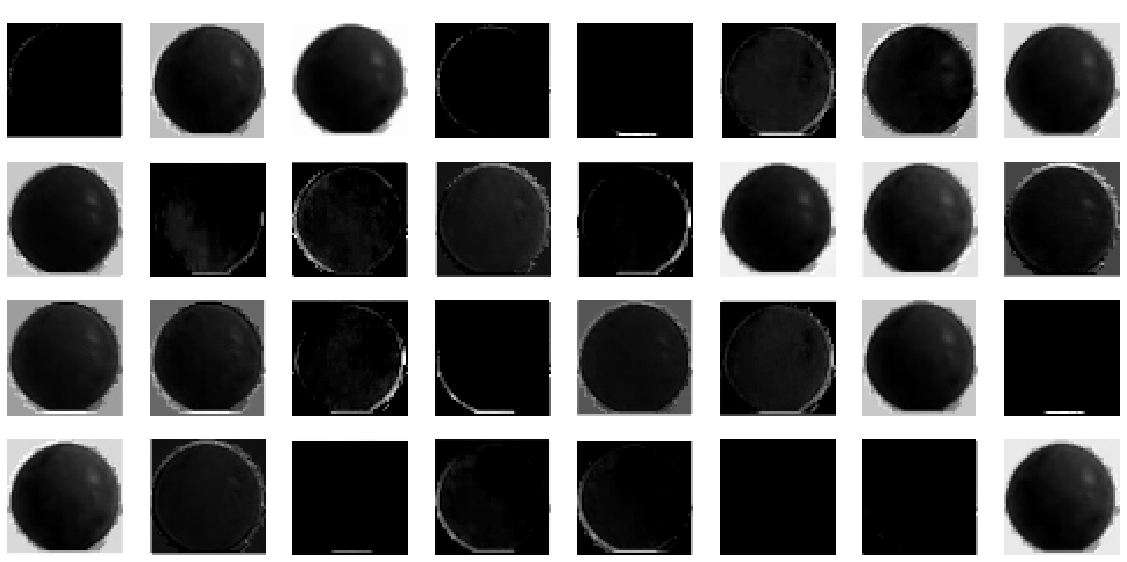

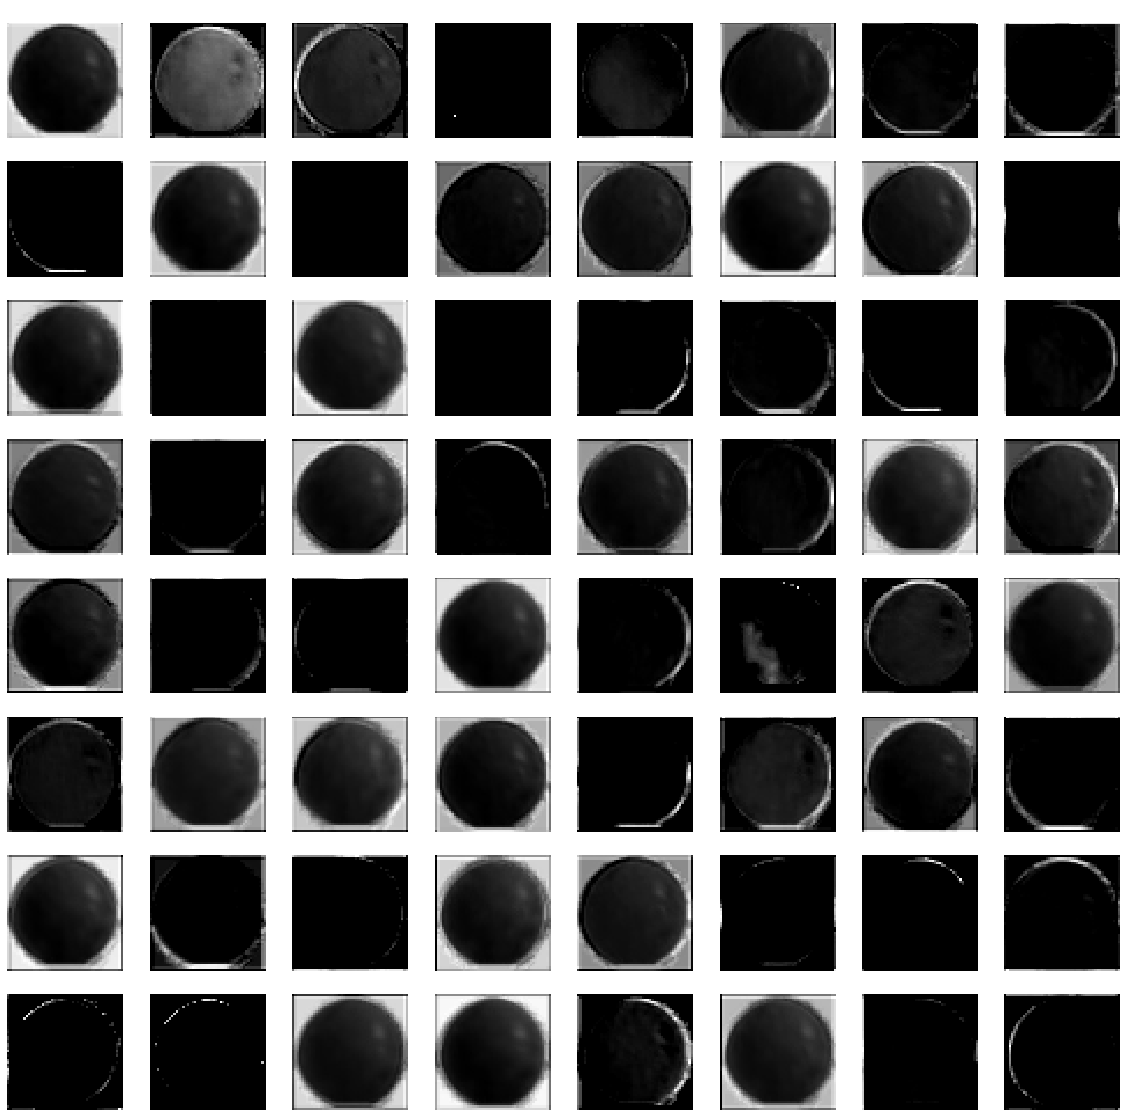

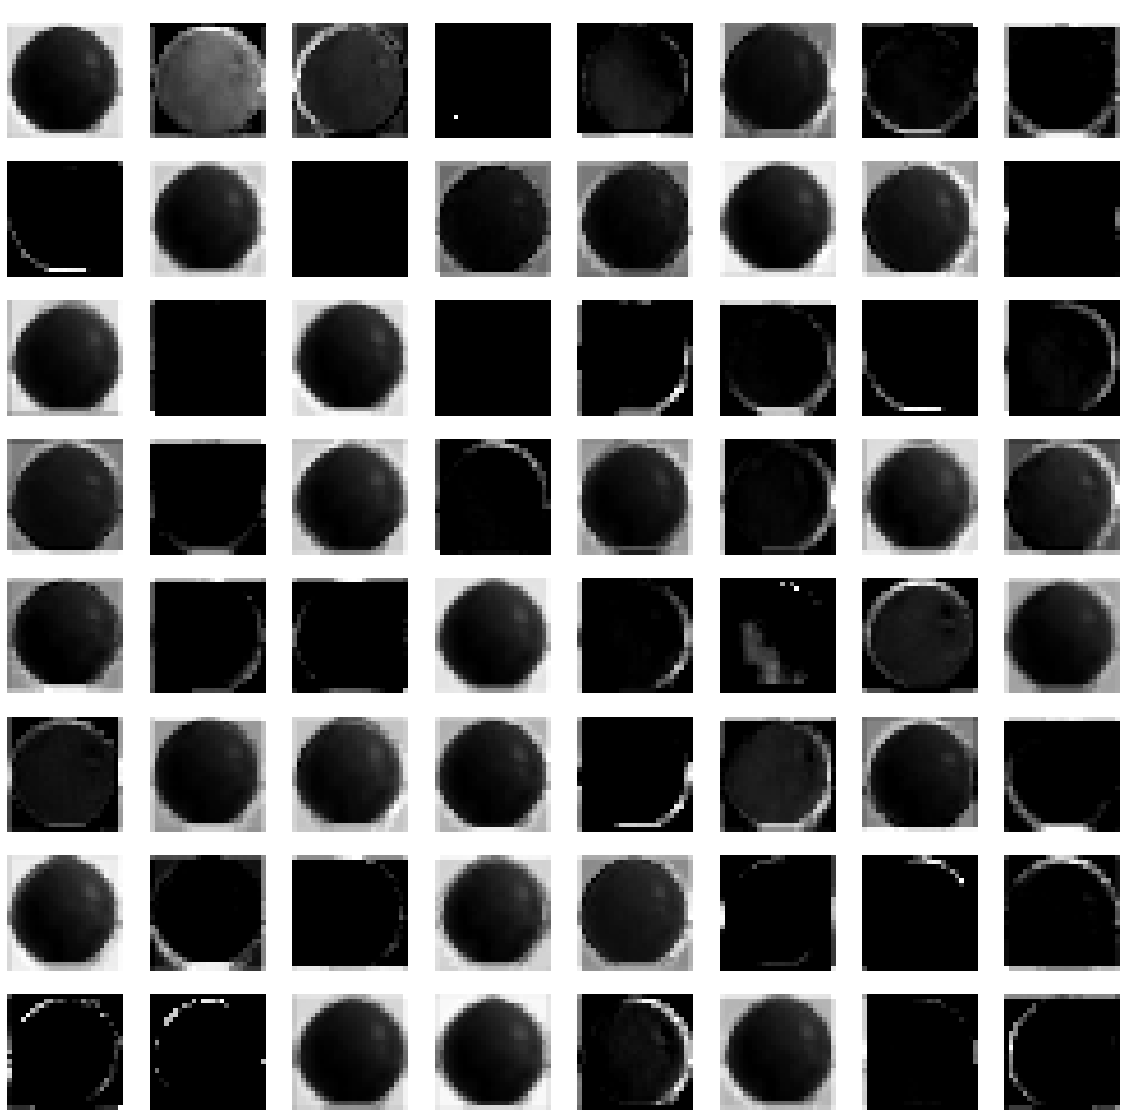

In [51]:
plot_model_filters(model.layers[:4], img)

#Overfitting

##Dropout

In [0]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=IMAGE_SIZE+(3,)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [53]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)            

In [54]:
history = train(model, train_data_gen)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 29 steps, validate for 14 steps
Epoch 1/15
29/29 [==============================] - 48s 2s/step - loss: 0.1498 - accuracy: 0.9206 - val_loss: 3.1496 - val_accuracy: 0.8281
Epoch 2/15
29/29 [==============================] - 47s 2s/step - loss: 1.3795e-04 - accuracy: 1.0000 - val_loss: 3.1100 - val_accuracy: 0.8281
Epoch 3/15
29/29 [==============================] - 47s 2s/step - loss: 6.6255e-06 - accuracy: 1.0000 - val_loss: 3.3331 - val_accuracy: 0.8281
Epoch 4/15
29/29 [==============================] - 47s 2s/step - loss: 6.9993e-06 - accuracy: 1.0000 - val_loss: 3.5017 - val_accuracy: 0.8281
Epoch 5/15
29/29 [==============================] - 47s 2s/step - loss: 4.8139e-06 - accuracy: 1.0000 - val_loss: 3.4797 - val_accuracy: 0.8281
Epoch 6/15
29/29 [==============================] - 48s 2s/step - loss: 2.4321e-06 - accuracy: 1.0000 - val_loss: 3.5466 - val_accuracy: 0.8281
Epoch 7/15
29/29 [==============================

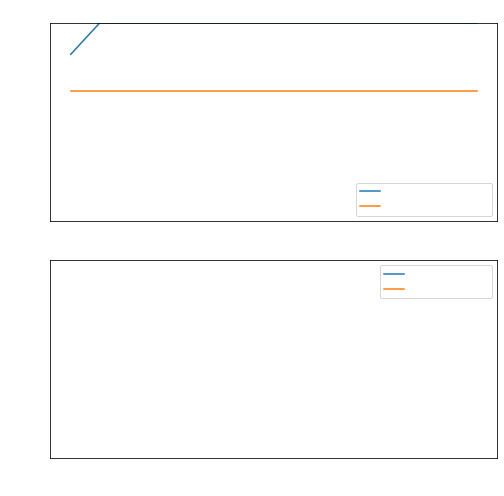

In [56]:
plot_accuracy_and_loss(history, acc_ylim=[0.5,1.0],loss_ylim=[0.5,0.75])

##Data augmentation

Found 3792 images belonging to 2 classes.


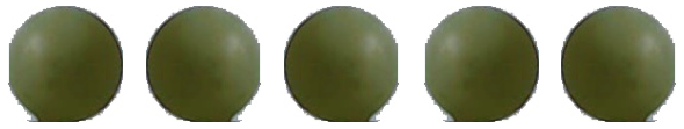

In [57]:
augmented_image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
augmented_train_data_gen = augmented_image_gen.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')
plot_images([augmented_train_data_gen[0][0][0] for i in range(5)])

Found 3792 images belonging to 2 classes.


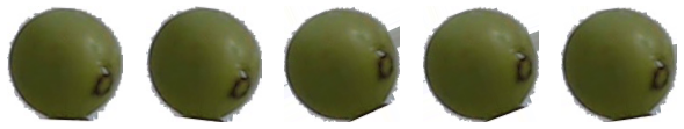

In [58]:
augmented_image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
augmented_train_data_gen = augmented_image_gen.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')
plot_images([augmented_train_data_gen[0][0][0] for i in range(5)])

Found 3792 images belonging to 2 classes.


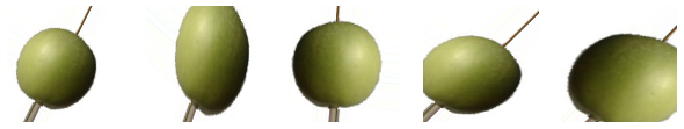

In [59]:
augmented_image_gen = ImageDataGenerator(
                                rescale=1./255,
                                rotation_range=45,
                                width_shift_range=.15,
                                height_shift_range=.15,
                                horizontal_flip=True,
                                zoom_range=0.5
                                )

augmented_train_data_gen = augmented_image_gen.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')
plot_images([augmented_train_data_gen[0][0][0] for i in range(5)])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)            

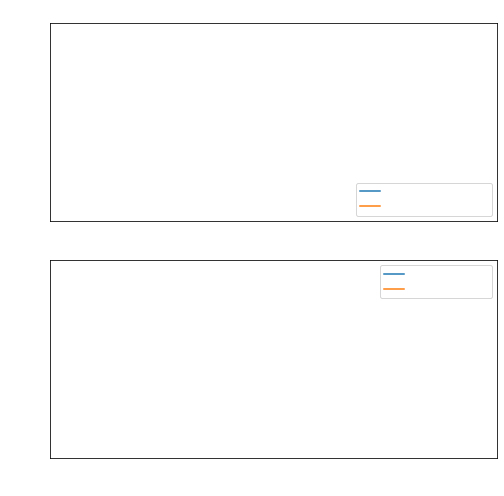

In [60]:
model.summary()
history = train(model, augmented_train_data_gen)
plot_accuracy_and_loss(history, acc_ylim=[0.5,0.8],loss_ylim=[0.5,0.75])